## Final Project Submission

Please fill out:
* Student name: Yvonnie Muthoni Wanyoike
* Student pace: full time
* Scheduled project review date/time: 19/12/2025
* Instructor name: Maryann Mwikali
* Blog post URL:


# Aircraft Risk Assessment Project

## Project Overview

This project identifies the lowest-risk aircraft for the company’s new aviation division by analyzing historical flight safety data.The aviation accident historical data is from the National Transportation Safety Board(NTSB) from 1962 to 2023 and its about civil aviation accidents and selected incidents in the United States and international waters.Through thorough data cleaning, imputation, and risk assessment, I transformed raw accident records into actionable insights to guide strategic purchasing decisions and minimize operational liability.

## Business Problem

Our organization is entering the aviation sector with no prior operational history, creating significant exposure to safety and financial liabilities. Without a data-driven understanding of aircraft reliability, the company risks investing in high-maintenance or accident-prone models. This project identifies aircrafts with the highest safety ratings and lowest historical risk profiles to ensure a secure market entry.

## Objectives

1. To analyze the accidents trends over the years.
2. To identify which aircraft `Make` & `Model` present the highest survival rate.
3. To assess whether multi-engine aircraft improve survival chances during emergencies and to determine which engine type offers the highest level of safety.
4. To determine the best-performing aircrafts in adverse weather conditions.


## Data Understanding

The data used in this project is a csv file named `Aviation_Data`from the National Transportation Safety Board (NTSB) that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

The dataset contains 90348 rows and 31 columns before data cleaning and analysis.


## Accessing Data

### Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Data

Use pandas to create a new DataFrame, called `df`, containing the data from the dataset in the file `Aviation_Data.csv` in the folder containing this notebook.

In [2]:
df = pd.read_csv('Aviation_Data.csv',low_memory=False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

#### Interpreting the Results
1. There are 90348 rows and 31 columns in the dataframe.
2. 5 columns contain numeric data while 26 contain categorical data.
3. Most of the columns contain missing values.

In [5]:
#check the columns in the dataframe
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Data Cleaning and Formatting

I'm working with the following columns that I'll assign to the variable (**working cols**) and they are: 
**'Event.Date', 'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model', 'Amateur.Built', 'No.of.Engines', 'Engine.Type', 'Schedule', 'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition' and 'Broad.phase.of.flight'.** 

Quite a number of them but I believe all these are  important factors in this analysis.

In [6]:
working_cols = ['Event.Date','Aircraft.damage','Aircraft.Category','Make','Model','Amateur.Built','Number.of.Engines'
                      ,'Engine.Type','Schedule','Purpose.of.flight','Total.Fatal.Injuries','Total.Serious.Injuries'
                      ,'Total.Minor.Injuries','Total.Uninjured','Weather.Condition','Broad.phase.of.flight']

### Data Standardization

In [7]:
# Define a list of columns (cols_to_fix) (excluding 'Event.Date' that I'll convert into a datetime datatype later)
cols_to_fix = ['Aircraft.damage', 'Aircraft.Category', 'Make', 'Model', 
               'Amateur.Built', 'Engine.Type', 'Schedule', 'Purpose.of.flight', 
               'Weather.Condition', 'Broad.phase.of.flight']

# Use .apply() with a lambda to fix every column in that list
# Add .str.strip() because there could be hidden spaces in the dataset
df[cols_to_fix] = df[cols_to_fix].apply(lambda x: x.str.upper().str.strip())

### Handling missing values

In [8]:
#check missing values in my working columns
df[working_cols].isna().sum()

Event.Date                 1459
Aircraft.damage            4653
Aircraft.Category         58061
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
Schedule                  77766
Purpose.of.flight          7651
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
dtype: int64

In [9]:
#check missing values in % form to estimate their relevance to the dataset
df[working_cols].isna().mean()*100

Event.Date                 1.614867
Aircraft.damage            5.150086
Aircraft.Category         64.263736
Make                       1.684597
Model                      1.716695
Amateur.Built              1.727764
Number.of.Engines          8.348829
Engine.Type                9.447913
Schedule                  86.073848
Purpose.of.flight          8.468367
Total.Fatal.Injuries      14.233851
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Uninjured            8.158454
Weather.Condition          6.586753
Broad.phase.of.flight     31.681941
dtype: float64

According to the above output, I'll replace with either the mean/median for numerical data while for categorical data I'll either use the most common value or a placeholder value depending on the variable.

The `Schedule` column must be excluded as a variable because it contains more missing values than actual observations, making it unviable for analysis.

In [10]:
working_cols.remove('Schedule')

#### Categorical Data

In [11]:
#check col values to determine whether to replace with common value/placeholder value
df['Aircraft.damage'].value_counts()

SUBSTANTIAL    64148
DESTROYED      18623
MINOR           2805
UNKNOWN          119
Name: Aircraft.damage, dtype: int64

In [12]:
#fill the 'Aircraft.damage' missing values with common value(UNKNOWN))
df['Aircraft.damage'] = df['Aircraft.damage'].fillna('UNKNOWN')
df['Aircraft.damage'].value_counts()

SUBSTANTIAL    64148
DESTROYED      18623
UNKNOWN         4772
MINOR           2805
Name: Aircraft.damage, dtype: int64

In [13]:
#check col values to determine whether to replace with common value/placeholder value
df['Aircraft.Category'].value_counts()

AIRPLANE             27617
HELICOPTER            3440
GLIDER                 508
BALLOON                231
GYROCRAFT              173
WEIGHT-SHIFT           161
POWERED PARACHUTE       91
ULTRALIGHT              30
UNKNOWN                 14
WSFT                     9
POWERED-LIFT             5
BLIMP                    4
UNK                      2
ULTR                     1
ROCKET                   1
Name: Aircraft.Category, dtype: int64

In [14]:
#Standardize the abbreviations
mapping = {'UNK': 'UNKNOWN',
           'ULTR': 'ULTRALIGHT',
           'WSFT': 'WEIGHT-SHIFT'
}
df['Aircraft.Category'] = df['Aircraft.Category'].replace(mapping)
df['Aircraft.Category'].value_counts()

AIRPLANE             27617
HELICOPTER            3440
GLIDER                 508
BALLOON                231
GYROCRAFT              173
WEIGHT-SHIFT           170
POWERED PARACHUTE       91
ULTRALIGHT              31
UNKNOWN                 16
POWERED-LIFT             5
BLIMP                    4
ROCKET                   1
Name: Aircraft.Category, dtype: int64

In [15]:
#fill the 'Aircraft.Category' missing values with common value (UNKNOWN)
df['Aircraft.Category'] = df['Aircraft.Category'].fillna('UNKNOWN')
df['Aircraft.Category'].value_counts()

UNKNOWN              58077
AIRPLANE             27617
HELICOPTER            3440
GLIDER                 508
BALLOON                231
GYROCRAFT              173
WEIGHT-SHIFT           170
POWERED PARACHUTE       91
ULTRALIGHT              31
POWERED-LIFT             5
BLIMP                    4
ROCKET                   1
Name: Aircraft.Category, dtype: int64

In [16]:
#check col values to determine whether to replace with common value/placeholder value
df['Make'].value_counts()

CESSNA               27149
PIPER                14870
BEECH                 5372
BOEING                2745
BELL                  2722
                     ...  
BARRIGER                 1
SCHLITTER RANDY J        1
ECKER                    1
SCHUTTE                  1
ZITO                     1
Name: Make, Length: 7587, dtype: int64

In [17]:
#fill the 'Make' missing values with a place holder value
df['Make'] = df['Make'].fillna('UNKNOWN') 
df['Make'].value_counts()

CESSNA               27149
PIPER                14870
BEECH                 5372
BOEING                2745
BELL                  2722
                     ...  
BARRIGER                 1
SCHLITTER RANDY J        1
ECKER                    1
SCHUTTE                  1
ZITO                     1
Name: Make, Length: 7587, dtype: int64

In [18]:
#check col values to determine whether to replace with common value/placeholder value
df['Model'].value_counts()

152                 2367
172                 1756
172N                1164
PA-28-140            932
150                  829
                    ... 
SKYSTAR KITFOX 4       1
IS-28-B2               1
L-1O11-385-1-15        1
CH 601 HD              1
A2 ERCOUPE             1
Name: Model, Length: 11646, dtype: int64

In [19]:
#fill the 'Model' missing values with a place holder value
df['Model'] = df['Model'].fillna('UNKNOWN')
df['Model'].value_counts()

152                 2367
172                 1756
UNKNOWN             1566
172N                1164
PA-28-140            932
                    ... 
SKYSTAR KITFOX 4       1
IS-28-B2               1
L-1O11-385-1-15        1
CH 601 HD              1
A2 ERCOUPE             1
Name: Model, Length: 11646, dtype: int64

In [20]:
#check col values to determine whether to replace with common value/placeholder value
df['Amateur.Built'].value_counts()

NO     80312
YES     8475
Name: Amateur.Built, dtype: int64

In [21]:
#fill the 'Amateur.Built' missing values with a place holder value
df['Amateur.Built'] = df['Amateur.Built'].fillna('UNKNOWN')
df['Amateur.Built'].value_counts()

NO         80312
YES         8475
UNKNOWN     1561
Name: Amateur.Built, dtype: int64

In [22]:
#check col values to determine whether to replace with common value/placeholder value
df['Engine.Type'].value_counts()

RECIPROCATING      69530
TURBO SHAFT         3609
TURBO PROP          3391
TURBO FAN           2481
UNKNOWN             2051
TURBO JET            703
NONE                  21
GEARED TURBOFAN       12
ELECTRIC              10
LR                     2
UNK                    1
HYBRID ROCKET          1
Name: Engine.Type, dtype: int64

In [23]:
#fill the 'Engine.Type' missing values with common value (UNKNOWN)
df['Engine.Type'] = df['Engine.Type'].fillna('UNKNOWN')
df['Engine.Type'].value_counts()

RECIPROCATING      69530
UNKNOWN            10587
TURBO SHAFT         3609
TURBO PROP          3391
TURBO FAN           2481
TURBO JET            703
NONE                  21
GEARED TURBOFAN       12
ELECTRIC              10
LR                     2
UNK                    1
HYBRID ROCKET          1
Name: Engine.Type, dtype: int64

In [24]:
#check col values to determine whether to replace with common value/placeholder value
df['Purpose.of.flight'].value_counts()

PERSONAL                     49448
INSTRUCTIONAL                10601
UNKNOWN                       6802
AERIAL APPLICATION            4712
BUSINESS                      4018
POSITIONING                   1646
OTHER WORK USE                1264
FERRY                          812
AERIAL OBSERVATION             794
PUBLIC AIRCRAFT                720
EXECUTIVE/CORPORATE            553
FLIGHT TEST                    405
SKYDIVING                      182
EXTERNAL LOAD                  123
PUBLIC AIRCRAFT - FEDERAL      105
BANNER TOW                     101
AIR RACE SHOW                   99
PUBLIC AIRCRAFT - LOCAL         74
PUBLIC AIRCRAFT - STATE         64
AIR RACE/SHOW                   59
GLIDER TOW                      53
FIREFIGHTING                    40
AIR DROP                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [25]:
#fill the 'Purpose.of.flight' missing values with a common value (UNKNOWN)
df['Purpose.of.flight'] = df['Purpose.of.flight'].fillna('UNKNOWN')
df['Purpose.of.flight'].value_counts()

PERSONAL                     49448
UNKNOWN                      14453
INSTRUCTIONAL                10601
AERIAL APPLICATION            4712
BUSINESS                      4018
POSITIONING                   1646
OTHER WORK USE                1264
FERRY                          812
AERIAL OBSERVATION             794
PUBLIC AIRCRAFT                720
EXECUTIVE/CORPORATE            553
FLIGHT TEST                    405
SKYDIVING                      182
EXTERNAL LOAD                  123
PUBLIC AIRCRAFT - FEDERAL      105
BANNER TOW                     101
AIR RACE SHOW                   99
PUBLIC AIRCRAFT - LOCAL         74
PUBLIC AIRCRAFT - STATE         64
AIR RACE/SHOW                   59
GLIDER TOW                      53
FIREFIGHTING                    40
AIR DROP                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [26]:
#check col values to determine whether to replace with common value/placeholder value
df['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK     1118
Name: Weather.Condition, dtype: int64

In [27]:
#fill the 'Weather.Condition' missing values with common value (UNK)
df['Weather.Condition'] = df['Weather.Condition'].fillna('UNK') 
df['Weather.Condition'].value_counts()

VMC    77303
UNK     7069
IMC     5976
Name: Weather.Condition, dtype: int64

In [28]:
#check col values to determine whether to replace with common value/placeholder value
df['Broad.phase.of.flight'].value_counts()

LANDING        15428
TAKEOFF        12493
CRUISE         10269
MANEUVERING     8144
APPROACH        6546
CLIMB           2034
TAXI            1958
DESCENT         1887
GO-AROUND       1353
STANDING         945
UNKNOWN          548
OTHER            119
Name: Broad.phase.of.flight, dtype: int64

In [29]:
#fill the 'Broad.phase.of.flight' missing values with common value (UNKNOWN)
df['Broad.phase.of.flight'] = df['Broad.phase.of.flight'].fillna('UNKNOWN')
df['Broad.phase.of.flight'].value_counts()

UNKNOWN        29172
LANDING        15428
TAKEOFF        12493
CRUISE         10269
MANEUVERING     8144
APPROACH        6546
CLIMB           2034
TAXI            1958
DESCENT         1887
GO-AROUND       1353
STANDING         945
OTHER            119
Name: Broad.phase.of.flight, dtype: int64

#### Numerical Data

In [30]:
#check the mean/mode for numeric columns to assess the best value to replace missing values
df[['Number.of.Engines','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']].describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


I have determined that the `median` is the most appropriate measure since the data in the columns can only take integer values.For example,we can't have 1.5 number of engines or injuries(people).

In [31]:
#fill missing values with the median in the numeric columns
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())

df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median())

df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median())

df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median())

df['Total.Uninjured'] = df['Total.Uninjured'].fillna(df['Total.Uninjured'].median())

### Casting

Let's convert the 'Event.Date' column from a string to a datetime datatype.This well help us check the trend analysis of the accidents over the years.

In [32]:
df['Event.Date']= pd.to_datetime(df['Event.Date'])
df['Event.Date'].value_counts()

1982-05-16    25
1984-06-30    25
2000-07-08    25
1983-06-05    24
1983-08-05    24
              ..
2020-03-23     1
2013-12-10     1
2014-11-06     1
2013-08-19     1
2016-12-22     1
Name: Event.Date, Length: 14782, dtype: int64

In [33]:
#checking for all duplicates
df[working_cols].duplicated(keep=False).sum()

1679

In [34]:
# Create a dataframe of just the duplicate rows
duplicates = df[df[working_cols].duplicated(keep=False)]

# Sort them so as to see the "twins" or "triplets" together
# Sort by 'Make' and 'Model' as an example
duplicates_sorted = duplicates.sort_values(by=['Make', 'Model']).head(20)

# Display the result
duplicates_sorted[working_cols]

,Event.Date,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
28705,1991-07-31,DESTROYED,UNKNOWN,AERO COMMANDER,500B,NO,2.0,RECIPROCATING,UNKNOWN,2.0,0.0,0.0,0.0,VMC,MANEUVERING
28706,1991-07-31,DESTROYED,UNKNOWN,AERO COMMANDER,500B,NO,2.0,RECIPROCATING,UNKNOWN,2.0,0.0,0.0,0.0,VMC,MANEUVERING
37682,1995-07-06,SUBSTANTIAL,UNKNOWN,AERO COMMANDER,S2R,NO,1.0,RECIPROCATING,AERIAL APPLICATION,0.0,0.0,0.0,1.0,VMC,MANEUVERING
37687,1995-07-06,SUBSTANTIAL,UNKNOWN,AERO COMMANDER,S2R,NO,1.0,RECIPROCATING,AERIAL APPLICATION,0.0,0.0,0.0,1.0,VMC,MANEUVERING
76870,2015-04-11,SUBSTANTIAL,AIRPLANE,AERONCA,7AC,NO,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,1.0,VMC,UNKNOWN
76871,2015-04-11,SUBSTANTIAL,AIRPLANE,AERONCA,7AC,NO,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,1.0,VMC,UNKNOWN
85691,2020-04-21,SUBSTANTIAL,AIRPLANE,AIR TRACTOR,AT 602,NO,1.0,TURBO PROP,AERIAL APPLICATION,0.0,0.0,0.0,1.0,VMC,UNKNOWN
85692,2020-04-21,SUBSTANTIAL,AIRPLANE,AIR TRACTOR,AT 602,NO,1.0,TURBO PROP,AERIAL APPLICATION,0.0,0.0,0.0,1.0,VMC,UNKNOWN
6002,1983-08-25,SUBSTANTIAL,UNKNOWN,AIR TRACTOR,AT-301,NO,1.0,RECIPROCATING,AERIAL APPLICATION,0.0,0.0,0.0,1.0,VMC,MANEUVERING
6006,1983-08-25,SUBSTANTIAL,UNKNOWN,AIR TRACTOR,AT-301,NO,1.0,RECIPROCATING,AERIAL APPLICATION,0.0,0.0,0.0,1.0,VMC,MANEUVERING


I'll create a new variable `working_cols1` to include `Event.Id` and `Registration.Number` columns to fully confirm that the accident records were duplicated. 

In [35]:
working_cols1 = working_cols + ['Event.Id','Registration.Number']
duplicates_sorted[working_cols1]

,Event.Date,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Event.Id,Registration.Number
28705,1991-07-31,DESTROYED,UNKNOWN,AERO COMMANDER,500B,NO,2.0,RECIPROCATING,UNKNOWN,2.0,0.0,0.0,0.0,VMC,MANEUVERING,20001212X17487,N702CA
28706,1991-07-31,DESTROYED,UNKNOWN,AERO COMMANDER,500B,NO,2.0,RECIPROCATING,UNKNOWN,2.0,0.0,0.0,0.0,VMC,MANEUVERING,20001212X17487,N904DF
37682,1995-07-06,SUBSTANTIAL,UNKNOWN,AERO COMMANDER,S2R,NO,1.0,RECIPROCATING,AERIAL APPLICATION,0.0,0.0,0.0,1.0,VMC,MANEUVERING,20001207X04087,N3662X
37687,1995-07-06,SUBSTANTIAL,UNKNOWN,AERO COMMANDER,S2R,NO,1.0,RECIPROCATING,AERIAL APPLICATION,0.0,0.0,0.0,1.0,VMC,MANEUVERING,20001207X03943,N5654X
76870,2015-04-11,SUBSTANTIAL,AIRPLANE,AERONCA,7AC,NO,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,1.0,VMC,UNKNOWN,20150413X45158,N85664
76871,2015-04-11,SUBSTANTIAL,AIRPLANE,AERONCA,7AC,NO,1.0,RECIPROCATING,PERSONAL,0.0,0.0,0.0,1.0,VMC,UNKNOWN,20150413X92719,N82658
85691,2020-04-21,SUBSTANTIAL,AIRPLANE,AIR TRACTOR,AT 602,NO,1.0,TURBO PROP,AERIAL APPLICATION,0.0,0.0,0.0,1.0,VMC,UNKNOWN,20200421X81851,N419TW
85692,2020-04-21,SUBSTANTIAL,AIRPLANE,AIR TRACTOR,AT 602,NO,1.0,TURBO PROP,AERIAL APPLICATION,0.0,0.0,0.0,1.0,VMC,UNKNOWN,20200422X14853,N653LA
6002,1983-08-25,SUBSTANTIAL,UNKNOWN,AIR TRACTOR,AT-301,NO,1.0,RECIPROCATING,AERIAL APPLICATION,0.0,0.0,0.0,1.0,VMC,MANEUVERING,20001214X44176,N4348S
6006,1983-08-25,SUBSTANTIAL,UNKNOWN,AIR TRACTOR,AT-301,NO,1.0,RECIPROCATING,AERIAL APPLICATION,0.0,0.0,0.0,1.0,VMC,MANEUVERING,20001214X43990,N8511S


According to the above records with `Event.Id` and `Registration.Number` columns included, we see that the 'duplicated' rows have the same events ID but two different registration numbers. This means two different planes were involved in the same crash, either a mid-air collision or a ground collision and therefore we can't drop them.

We however can drop rows where the same plane is logged twice for one event.

In [36]:
# Drop only rows where the same plane is logged twice for one event
df = df.drop_duplicates(subset=['Event.Id', 'Registration.Number'], keep='first')

In [37]:
print(df[working_cols1].duplicated().sum())

0


In [38]:
df[working_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88861 entries, 0 to 90347
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              88860 non-null  datetime64[ns]
 1   Aircraft.damage         88861 non-null  object        
 2   Aircraft.Category       88861 non-null  object        
 3   Make                    88861 non-null  object        
 4   Model                   88861 non-null  object        
 5   Amateur.Built           88861 non-null  object        
 6   Number.of.Engines       88861 non-null  float64       
 7   Engine.Type             88861 non-null  object        
 8   Purpose.of.flight       88861 non-null  object        
 9   Total.Fatal.Injuries    88861 non-null  float64       
 10  Total.Serious.Injuries  88861 non-null  float64       
 11  Total.Minor.Injuries    88861 non-null  float64       
 12  Total.Uninjured         88861 non-null  float6

We still have a single row with a missing date in the `Event.Date` column so let's drop it.

In [39]:
# Drop the single row with the missing date
df = df.dropna(subset=['Event.Date'])

In [40]:
df[working_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88860 entries, 0 to 90347
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Date              88860 non-null  datetime64[ns]
 1   Aircraft.damage         88860 non-null  object        
 2   Aircraft.Category       88860 non-null  object        
 3   Make                    88860 non-null  object        
 4   Model                   88860 non-null  object        
 5   Amateur.Built           88860 non-null  object        
 6   Number.of.Engines       88860 non-null  float64       
 7   Engine.Type             88860 non-null  object        
 8   Purpose.of.flight       88860 non-null  object        
 9   Total.Fatal.Injuries    88860 non-null  float64       
 10  Total.Serious.Injuries  88860 non-null  float64       
 11  Total.Minor.Injuries    88860 non-null  float64       
 12  Total.Uninjured         88860 non-null  float6

We are now working with 88860 rows and 15 columns.

In [41]:
w_df = df[working_cols].copy()

In [42]:
#confirm that there are no missing values
w_df.isna().sum()

Event.Date                0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
dtype: int64

## Data Analysis and Visualization

## Feature Engineering

This is the process of creating, transforming or selecting variables that make your dataframe more accurate and insightful.

I'll create a new column `Year` to separate the years from `Event.Date` so as to analyze the accidents trends over the years.

In [43]:
#create a new column containing only the years
w_df['Year'] = w_df['Event.Date'].dt.year

I'll also also create a `Total.Occupants` column to calculate the survival rates, which will then be used in the analysis.

In [44]:
#create a Total.Occupants column
w_df['Total.Occupants'] = w_df[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries'
                                ,'Total.Uninjured']].sum(axis=1)

In [45]:
#create a variable of survivors
Total_Survivors = ['Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured']

#fill NaNs with 0 to ensure the math works
w_df[Total_Survivors] = w_df[Total_Survivors].fillna(0)

#calculate the total number of survivors
w_df['Total.Survivors'] = w_df[Total_Survivors].sum(axis=1)

In [46]:
#calculate Survival.Rate and add it as a column
w_df['Survival.Rate'] = ((w_df['Total.Survivors'] / w_df['Total.Occupants'])*100).round()

In [47]:
#create function to categorize survival rates
def survival_categories(surv):
    if surv == 0:
        return 'Non Survivable'
    elif surv <= 50:
        return 'Low Survivability'
    elif surv <= 90:
        return 'High Survivability'
    else:
        return 'Fully Survivable'
    
#create new categorical column
w_df['Survival.Category'] = w_df['Survival.Rate'].apply(survival_categories) 

In [48]:
(w_df ['Year'] == 1981).value_counts().head()

False    88859
True         1
Name: Year, dtype: int64

In [49]:
#check new cols
w_df.head(5)

,Event.Date,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Year,Total.Occupants,Total.Survivors,Survival.Rate,Survival.Category
0,1948-10-24,DESTROYED,UNKNOWN,STINSON,108-3,NO,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,UNK,CRUISE,1948,2.0,0.0,0.0,Non Survivable
1,1962-07-19,DESTROYED,UNKNOWN,PIPER,PA24-180,NO,1.0,RECIPROCATING,PERSONAL,4.0,0.0,0.0,0.0,UNK,UNKNOWN,1962,4.0,0.0,0.0,Non Survivable
2,1974-08-30,DESTROYED,UNKNOWN,CESSNA,172M,NO,1.0,RECIPROCATING,PERSONAL,3.0,0.0,0.0,1.0,IMC,CRUISE,1974,4.0,1.0,25.0,Low Survivability
3,1977-06-19,DESTROYED,UNKNOWN,ROCKWELL,112,NO,1.0,RECIPROCATING,PERSONAL,2.0,0.0,0.0,0.0,IMC,CRUISE,1977,2.0,0.0,0.0,Non Survivable
4,1979-08-02,DESTROYED,UNKNOWN,CESSNA,501,NO,1.0,UNKNOWN,PERSONAL,1.0,2.0,0.0,0.0,VMC,APPROACH,1979,3.0,2.0,67.0,High Survivability


### Aggregation

### Objective 1: To analyze the accidents trends over the years

In [50]:
#count accidents per year
accident_counts = w_df.groupby('Year').size()

#sort the accidents by year
accident_counts = accident_counts.sort_index()

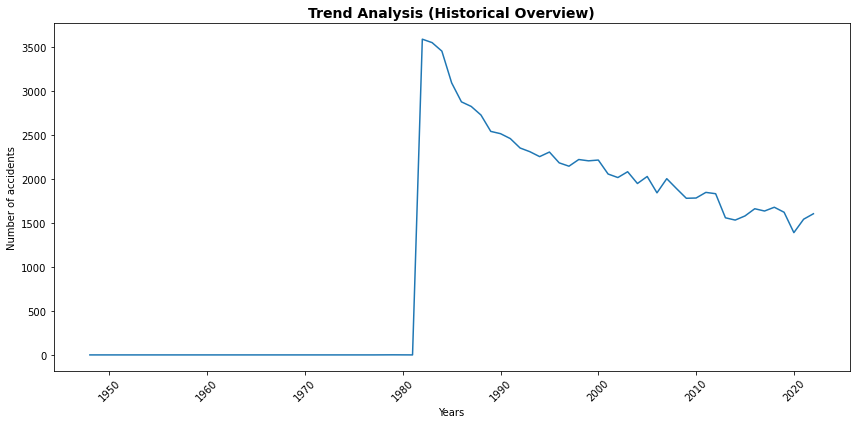

In [51]:
plt.figure(figsize=(12,6))
plt.plot(accident_counts.index,accident_counts.values)
plt.title('Trend Analysis (Historical Overview)',fontsize=14, fontweight='bold')
plt.xlabel('Years')
plt.ylabel('Number of accidents')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

According to my research, The NTSB (National Transportation Safety Board) began its modern, comprehensive electronic record-keeping in 1982. Data before that is often missing hence inconsistent data showing only a handful of incidents per year compared to the thousands recorded annually once modern reporting began.This is reason why the line is flat at zero until 1982.

So let's fix that by filtering the data excluding data prior to 1982.

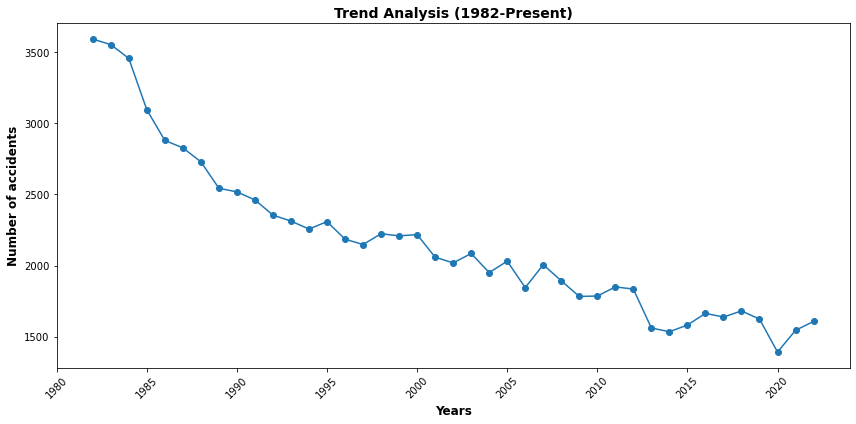

In [52]:
# Filter to only show modern records
modern_df = w_df[w_df['Year'] >= 1982]

#Sort again by Year
modern_trends = modern_df.groupby('Year').size().sort_index()

#plot the line graph
plt.figure(figsize=(12,6))
plt.plot(modern_trends.index,modern_trends.values, marker='o')
plt.title('Trend Analysis (1982-Present)',fontsize=14, fontweight='bold')
plt.xlabel('Years', fontsize=12, fontweight='bold')
plt.ylabel('Number of accidents',fontsize=12, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

We can see that in the early 80s, there were nearly 3,600 accidents a year but that improved by 2020 and the number dropped significantly to roughly 1500.

Therefore, even though there are significantly more planes in the sky today than in 1982, the total number of accidents has dropped by more than 50%.

This then confirms that the aircraft industry currently presents a sound investment opportunity.

### Objective 2: To identify which `Make` & `Model` present the highest survival rate

In [53]:
# Group by Make and Model
#calculate the mean survival rate and the count of incidents
safety_stats = w_df.groupby(['Make', 'Model']).agg(
    #keep the Category (using 'first' picks the most common label)
    Amateur_Built= ('Amateur.Built', 'first'),
    Aircraft_Type=('Aircraft.Category', 'first'),
    Avg_Survival_Rate=('Survival.Rate', 'mean'),
    Total_Incidents=('Survival.Rate', 'count')
)

#filter for Statistical Significance
# We only want aircrafts with enough data to be "proven" (e.g., an aircraft has at least 20 incidents)
proven_safety = safety_stats[safety_stats['Total_Incidents'] >= 20].copy()

#sort by the safest (Highest average survival rate)
safest_planes = proven_safety.sort_values(by='Avg_Survival_Rate', ascending=False)

safest_planes.head(10)

Amateur_Built Aircraft_Type  \
Make                          Model                                       
GRUMMAN                       G164B                    NO      AIRPLANE   
LET                           BLANIK L-13              NO       UNKNOWN   
CONSOLIDATED AERONAUTICS INC. LAKE LA-4-200            NO       UNKNOWN   
BOEING                        717-200                  NO       UNKNOWN   
                              757-232                  NO       UNKNOWN   
                              777                      NO       UNKNOWN   
ROBINSON HELICOPTER           R22                      NO    HELICOPTER   
PIPER                         PA 28                    NO       UNKNOWN   
EMBRAER                       EMB-145LR                NO       UNKNOWN   
AVIAT AIRCRAFT INC            A-1B                     NO      AIRPLANE   

                                             Avg_Survival_Rate  \
Make                          Model                              
GRUMMAN                       G164B                      100.0   
LET                           BLANIK L-13                100.0   
CONSOLIDATED AERONAUTICS INC. LAKE LA-4-200              100.0   
BOEING                        717-200                    100.0   
                              757-232                    100.0   
                              777                        100.0   
ROBINSON HELICOPTER           R22                        100.0   
PIPER                         PA 28                      100.0   
EMBRAER                       EMB-145LR                  100.0   
AVIAT AIRCRAFT INC            A-1B                       100.0   

                                             Total_Incidents  
Make                          Model                           
GRUMMAN                       G164B                       21  
LET                           BLANIK L-13                 34  
CONSOLIDATED AERONAUTICS INC. LAKE LA-4-200               25  
BOEING                        717-200                     20  
                              757-232                     23  
                              777                         51  
ROBINSON HELICOPTER           R22                         21  
PIPER                         PA 28                       22  
EMBRAER                       EMB-145LR                   21  
AVIAT AIRCRAFT INC            A-1B                        22

The `Aircraft_Type` category contains many unknown values, so I carried out due diligence by retrieving the missing information from Google, as it is readily accessible.

They are categorized as follows:
* LET	BLANIK - GLIDER
* CONSOLIDATED AERONAUTICS INC. - AIRPLANE
* BOEING -AIRPLANE
* PIPER	- AIRPLANE
* EMBRAER - AIRPLANE	



Let's replace the "UNKNOWN" labels with the above correct categories.

In [54]:
# create a copy of safest_planes df
safest_planes = safest_planes.copy()

# Update the specific rows by providing the (Make, Model) pair
# Use df.at
safest_planes.at[('LET', 'BLANIK L-13'), 'Aircraft_Type'] = 'GLIDER'
safest_planes.at[('CONSOLIDATED AERONAUTICS INC.', 'LAKE LA-4-200'), 'Aircraft_Type'] = 'AIRPLANE'
safest_planes.at[('BOEING', '717-200'), 'Aircraft_Type'] = 'AIRPLANE'
safest_planes.at[('BOEING', '757-232'), 'Aircraft_Type'] = 'AIRPLANE'
safest_planes.at[('BOEING', '777'), 'Aircraft_Type'] = 'AIRPLANE'
safest_planes.at[('PIPER', 'PA 28'), 'Aircraft_Type'] = 'AIRPLANE'
safest_planes.at[('EMBRAER', 'EMB-145LR'), 'Aircraft_Type'] = 'AIRPLANE'

# check changes
safest_planes.head(10)

Amateur_Built Aircraft_Type  \
Make                          Model                                       
GRUMMAN                       G164B                    NO      AIRPLANE   
LET                           BLANIK L-13              NO        GLIDER   
CONSOLIDATED AERONAUTICS INC. LAKE LA-4-200            NO      AIRPLANE   
BOEING                        717-200                  NO      AIRPLANE   
                              757-232                  NO      AIRPLANE   
                              777                      NO      AIRPLANE   
ROBINSON HELICOPTER           R22                      NO    HELICOPTER   
PIPER                         PA 28                    NO      AIRPLANE   
EMBRAER                       EMB-145LR                NO      AIRPLANE   
AVIAT AIRCRAFT INC            A-1B                     NO      AIRPLANE   

                                             Avg_Survival_Rate  \
Make                          Model                              
GRUMMAN                       G164B                      100.0   
LET                           BLANIK L-13                100.0   
CONSOLIDATED AERONAUTICS INC. LAKE LA-4-200              100.0   
BOEING                        717-200                    100.0   
                              757-232                    100.0   
                              777                        100.0   
ROBINSON HELICOPTER           R22                        100.0   
PIPER                         PA 28                      100.0   
EMBRAER                       EMB-145LR                  100.0   
AVIAT AIRCRAFT INC            A-1B                       100.0   

                                             Total_Incidents  
Make                          Model                           
GRUMMAN                       G164B                       21  
LET                           BLANIK L-13                 34  
CONSOLIDATED AERONAUTICS INC. LAKE LA-4-200               25  
BOEING                        717-200                     20  
                              757-232                     23  
                              777                         51  
ROBINSON HELICOPTER           R22                         21  
PIPER                         PA 28                       22  
EMBRAER                       EMB-145LR                   21  
AVIAT AIRCRAFT INC            A-1B                        22

In [55]:
# Extract only the Airplanes
safest_airplanes = safest_planes[safest_planes['Aircraft_Type'] == 'AIRPLANE']
safest_airplanes.head(10)

Amateur_Built Aircraft_Type  \
Make                          Model                                       
GRUMMAN                       G164B                    NO      AIRPLANE   
CONSOLIDATED AERONAUTICS INC. LAKE LA-4-200            NO      AIRPLANE   
BOEING                        717-200                  NO      AIRPLANE   
                              757-232                  NO      AIRPLANE   
                              777                      NO      AIRPLANE   
PIPER                         PA 28                    NO      AIRPLANE   
EMBRAER                       EMB-145LR                NO      AIRPLANE   
AVIAT AIRCRAFT INC            A-1B                     NO      AIRPLANE   
EVEKTOR-AEROTECHNIK AS        SPORTSTAR                NO      AIRPLANE   
PIPER                         PA 18                    NO      AIRPLANE   

                                             Avg_Survival_Rate  \
Make                          Model                              
GRUMMAN                       G164B                      100.0   
CONSOLIDATED AERONAUTICS INC. LAKE LA-4-200              100.0   
BOEING                        717-200                    100.0   
                              757-232                    100.0   
                              777                        100.0   
PIPER                         PA 28                      100.0   
EMBRAER                       EMB-145LR                  100.0   
AVIAT AIRCRAFT INC            A-1B                       100.0   
EVEKTOR-AEROTECHNIK AS        SPORTSTAR                  100.0   
PIPER                         PA 18                      100.0   

                                             Total_Incidents  
Make                          Model                           
GRUMMAN                       G164B                       21  
CONSOLIDATED AERONAUTICS INC. LAKE LA-4-200               25  
BOEING                        717-200                     20  
                              757-232                     23  
                              777                         51  
PIPER                         PA 28                       22  
EMBRAER                       EMB-145LR                   21  
AVIAT AIRCRAFT INC            A-1B                        22  
EVEKTOR-AEROTECHNIK AS        SPORTSTAR                   21  
PIPER                         PA 18                       27

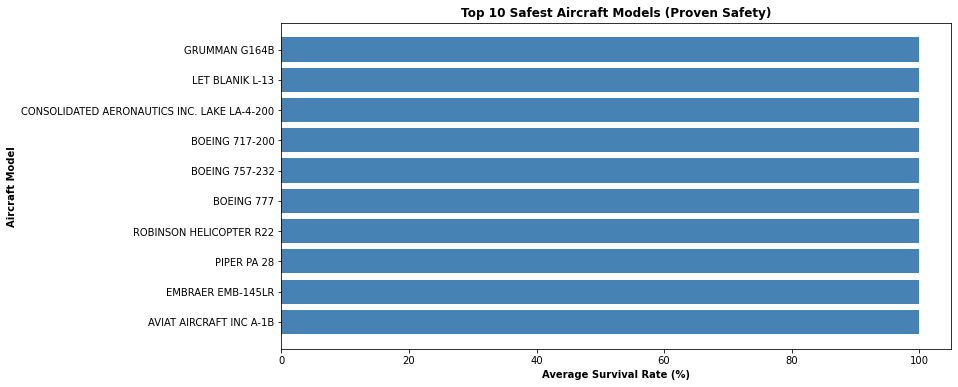

In [64]:
# Prepare a subset for the graph (Top 10)
# We reset the index to turn Make and Model back into normal columns for labeling
plot_data = safest_planes.head(10).reset_index()

# Create a "Full Name" column to concatenate 'Make' & 'Model' (e.g., "CESSNA 172")
plot_data['Full_Name'] = plot_data['Make'] + " " + plot_data['Model']

# Create the plot and sets the size of the window
plt.figure(figsize=(12, 6))

plt.barh(plot_data['Full_Name'], plot_data['Avg_Survival_Rate'], color='#4682B4')

# Add labels and title
plt.xlabel('Average Survival Rate (%)', fontweight= 'bold')
plt.ylabel('Aircraft Model', fontweight= 'bold')
plt.title('Top 10 Safest Aircraft Models (Proven Safety)', fontweight= 'bold')

# flip the order so the #1 plane is at the top
plt.gca().invert_yaxis() 

# 6. Show the graph
plt.show()

Based on this analysis, I recommend the **Boeing 717-200, 757-232, and 777** series, as well as the **Embraer EMB-145LR**, for commercial operations.

For private use, the **Grumman G164B** is well suited for agricultural applications, while the **Consolidated Aeronautics Inc. LAKE LA-4-200** is an amphibious aircraft capable of both land and water operations, making it ideal for ecological surveys and personal transport. The **Piper PA-28 and PA-18** models are well suited for flight training, and the **Evektor-Aerotechnik AS SPORTSTAR** is suitable for both flight training and touring flights.

For bush flying and wildlife patrol missions, the **Aviat Aircraft Inc. A-1B** is a strong choice. In addition, the **LET BLANIK L-13** is recommended for gliding activities, while the **Robinson Helicopter R22** is an appropriate option in the helicopter category.

### Objective 3: To assess whether multi-engine aircraft improve survival chances during emergencies and to determine which engine type offers the highest level of safety.

Looking at the `Make` and `Model` tells us which specific planes performed well but looking at the `Engine Type` tells us which technologies we should trust.

In [57]:
# Group by both Engine Type and Number of Engines
engine_mix = w_df.groupby(['Engine.Type', 'Number.of.Engines']).agg(
    Avg_Survival_Rate=('Survival.Rate', 'mean'),
    Total_Incidents=('Survival.Rate', 'count'))


# filter for Statistical Significance (20+ incidents)
proven_mix = engine_mix[engine_mix['Total_Incidents'] >= 20].copy()

# sort by survival rate
safest_mix = proven_mix.sort_values(by='Avg_Survival_Rate', ascending=False)


safest_mix.head(15)

Avg_Survival_Rate  Total_Incidents
Engine.Type   Number.of.Engines                                    
TURBO JET     3.0                        99.138614              101
TURBO FAN     3.0                        98.142857              357
              2.0                        93.887749             1657
              4.0                        93.590717              237
UNKNOWN       0.0                        89.668590             1213
TURBO JET     4.0                        87.479167               48
              2.0                        85.916100              441
UNKNOWN       4.0                        85.185185               27
RECIPROCATING 1.0                        84.691790            63473
TURBO SHAFT   1.0                        84.121809             3095
TURBO FAN     1.0                        81.444444               99
RECIPROCATING 4.0                        80.964286               56
TURBO PROP    1.0                        80.299218             1534
              2.0                        79.357103             1795
UNKNOWN       2.0                        79.044807              491

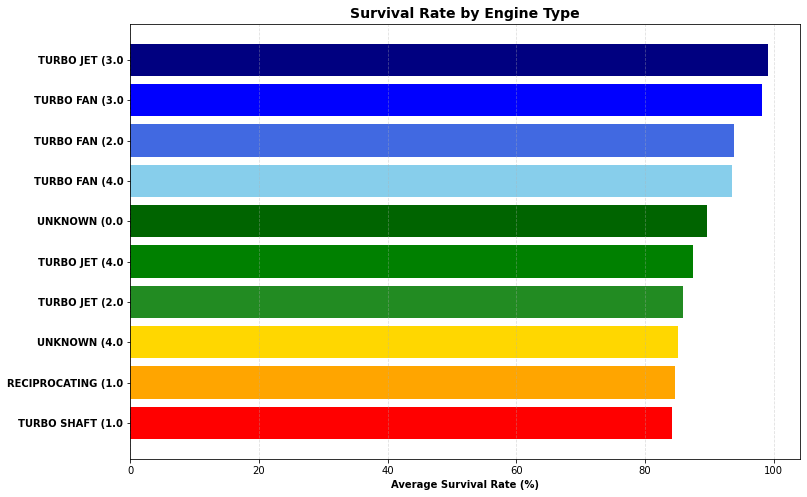

In [65]:
# Reset index to make columns accessible for plotting
plot_mix = safest_mix.head(10).reset_index()

# Create a combined label like "Turbo Fan (2 Engines)"
plot_mix['Engine_Description'] = (plot_mix['Engine.Type'] +  " (" + plot_mix['Number.of.Engines'].astype(str))

# Plotting
plt.figure(figsize=(12, 8))

my_colors = ['navy', 'blue', 'royalblue', 'skyblue', 'darkgreen', 'green', 'forestgreen', 'gold', 'orange', 'red']

plt.barh(plot_mix['Engine_Description'], plot_mix['Avg_Survival_Rate'], color=my_colors)

plt.title('Survival Rate by Engine Type', fontsize=14, fontweight='bold')
plt.xlabel('Average Survival Rate (%)', fontweight='bold')
plt.yticks(fontweight='bold')
plt.gca().invert_yaxis()
    
plt.grid(axis='x', linestyle='--', alpha=0.4)    
plt.show()

From the analysis above, we can see that indeed the multi engine aircrafts have a higher survival rate compared to the single engine ones. 

The 3 or 4-engine planes have near-perfect survival rates however only for the Turbo Fan and Turbo Jet engine types, which are found in commercial airplanes.  

### Objective 4: To determine the best-performing aircraft in adverse weather conditions

In [67]:
# Group by Weather, Make and Model
weather_analysis = w_df.groupby(['Weather.Condition', 'Make', 'Model']).agg(
    Avg_Survival_Rate=('Survival.Rate', 'mean'),
    Total_Incidents=('Survival.Rate', 'count')
)

# filter for Statistical Significance
# We want at least 10 incidents per weather/model combo to trust the number
proven_weather = weather_analysis[weather_analysis['Total_Incidents'] >= 10].copy()

# sort to see the best performers in bad weather (IMC)
imc_safety = proven_weather.loc['IMC'].sort_values(by='Avg_Survival_Rate', ascending=False)


imc_safety.head(10)

Avg_Survival_Rate  Total_Incidents
Make   Model                                        
BEECH  1900D             100.000000               12
BOEING 737-300            99.800000               10
PIPER  PA-18-150          80.000000               10
       PA-18              78.300000               10
CESSNA 207A               77.571429               14
BEECH  1900C              77.272727               11
CESSNA 207                74.724138               29
       402C               72.413793               29
CIRRUS SR22               70.333333               15
CESSNA 550                70.000000               10

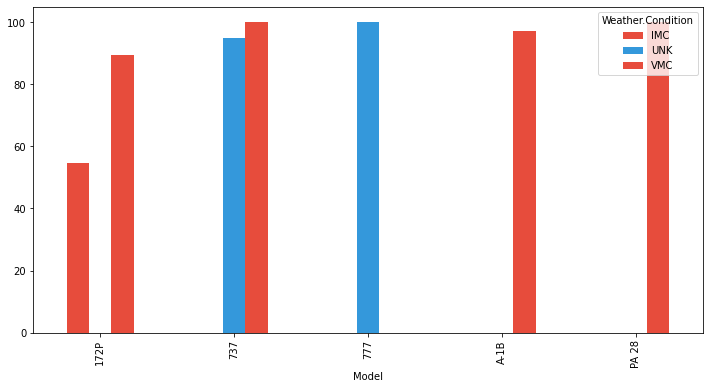

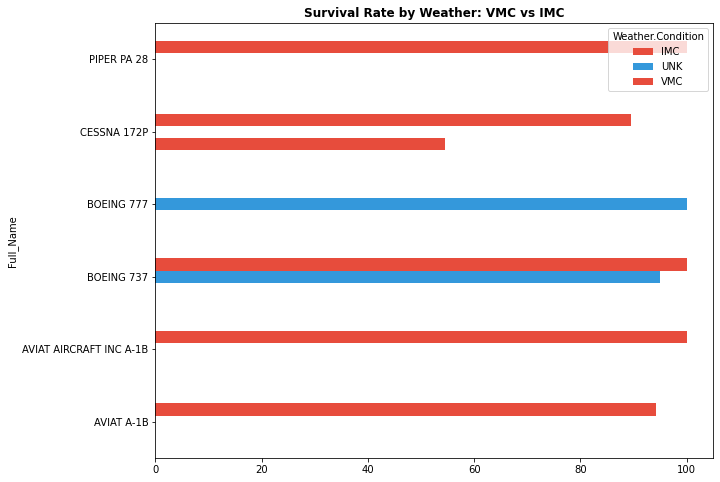

In [71]:
# Replace your pivot line with this:
weather_pivot = plot_weather.pivot_table(
    index='Model', 
    columns='Weather.Condition', 
    values='Avg_Survival_Rate',
    aggfunc='mean'  # This tells Python: "If you find duplicates, average them"
)

# Now plot as before
weather_pivot.plot(kind='bar', figsize=(12, 6), color=['#e74c3c', '#3498db'])

# Create a unique identifier
plot_weather['Full_Name'] = plot_weather['Make'] + " " + plot_weather['Model']

# Pivot using the unique Full_Name
weather_pivot = plot_weather.pivot_table(
    index='Full_Name', 
    columns='Weather.Condition', 
    values='Avg_Survival_Rate'
)

weather_pivot.plot(kind='barh', figsize=(10, 8), color=['#e74c3c', '#3498db'])
plt.title('Survival Rate by Weather: VMC vs IMC', fontweight='bold')
plt.show()

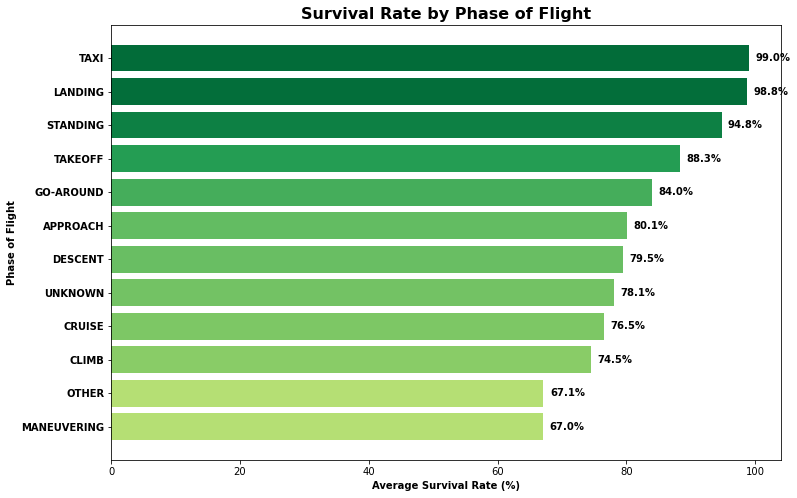

In [75]:
# 1. Group by the Phase of Flight
phase_analysis = w_df.groupby('Broad.phase.of.flight').agg(
    Avg_Survival_Rate=('Survival.Rate', 'mean'),
    Total_Incidents=('Survival.Rate', 'count')
).reset_index()

# 2. Filter for Statistical Significance (e.g., at least 20 incidents)
# This removes phases like "OTHER" or "UNKNOWN" if they have very little data
phase_proven = phase_analysis[phase_analysis['Total_Incidents'] >= 20].copy()

# 3. Sort by the highest survival rate
phase_proven = phase_proven.sort_values(by='Avg_Survival_Rate', ascending=False)

# 4. Create a professional color list
# Using a gradient from Green (Safe) to Orange (Lower Survival)
colors = plt.cm.RdYlGn(phase_proven['Avg_Survival_Rate'] / 100)

# 5. Plotting
plt.figure(figsize=(12, 8))
bars = plt.barh(phase_proven['Broad.phase.of.flight'], 
                phase_proven['Avg_Survival_Rate'], 
                color=colors)

# Add percentage labels to the ends of the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', va='center', fontweight='bold')

plt.title('Survival Rate by Phase of Flight', fontsize=16, fontweight='bold')
plt.xlabel('Average Survival Rate (%)', fontweight='bold')
plt.ylabel('Phase of Flight', fontweight='bold')
plt.yticks(fontweight='bold')
plt.gca().invert_yaxis()
plt.show()

In [78]:
# 1. Create a Pivot Table of Damage Counts
damage_counts = w_df.groupby(['Make', 'Model', 'Aircraft.damage']).size().unstack(fill_value=0)

# 2. Add a Total column and filter for significance (20+ incidents)
damage_counts['Total'] = damage_counts.sum(axis=1)
proven_damage = damage_counts[damage_counts['Total'] >= 20].copy()

# 3. Normalize the data (Convert counts to percentages)
# This allows you to compare a Boeing 737 to a Cessna 172 fairly
damage_pct = proven_damage.div(proven_damage['Total'], axis=0) * 100

# 4. Clean up: Drop the 'Total' column for plotting and sort by 'Destroyed'
damage_pct = damage_pct.drop(columns=['Total']).sort_values(by='DESTROYED', ascending=True)

# 5. View the top 10 most "durable" models (lowest % destroyed)
print(damage_pct.head(10))

Aircraft.damage                 DESTROYED      MINOR  SUBSTANTIAL    UNKNOWN
Make                   Model                                                
BOEING                 717-200        0.0  15.000000    25.000000  60.000000
                       787            0.0  30.769231     7.692308  61.538462
ROCKWELL INTERNATIONAL S-2R           0.0   0.000000    95.833333   4.166667
BOEING                 757-232        0.0  21.739130    21.739130  56.521739
                       757-222        0.0  28.571429    19.047619  52.380952
PIPER                  PA 28          0.0   0.000000   100.000000   0.000000
AIR TRACTOR INC        AT-502B        0.0   3.846154    96.153846   0.000000
PIPER                  PA 18          0.0   0.000000   100.000000   0.000000
MCDONNELL DOUGLAS      MD-88          0.0  42.857143    38.095238  19.047619
AVIAT AIRCRAFT INC     A-1B           0.0   0.000000   100.000000   0.000000
